In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# generate data
cov = np.eye(3)
np.random.seed(42)
c0 = np.random.multivariate_normal([0.0, 0.0, 0.0], cov, size=10)
c1 = np.random.multivariate_normal([2.0, 2.0, 0.0], cov, size=10)
c2 = np.random.multivariate_normal([2.0, 2.0, 3.0], cov, size=10)
data = np.vstack((c0, c1, c2))

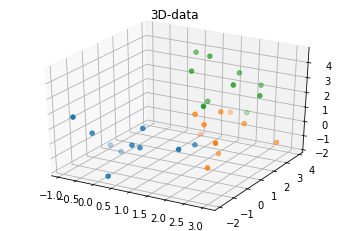

In [3]:
# plot data to 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(c0[:, 0], c0[:, 1], c0[:, 2])
ax.scatter3D(c1[:, 0], c1[:, 1], c1[:, 2])
ax.scatter3D(c2[:, 0], c2[:, 1], c2[:, 2])
ax.set_title("3D-data")
plt.savefig("3d_data.png")
plt.show()

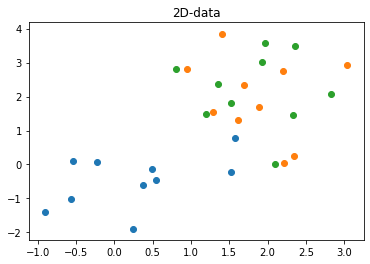

In [4]:
# plot data to 2D plane
plt.scatter(c0[:, 0], c0[:, 1])
plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])
plt.title("2D-data")
plt.savefig("2d_data.png")
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
# initialize KMeans class
km = KMeans(n_clusters=3, random_state=42)

In [7]:
# predict cluster from 2D data
label = km.fit_predict(data[:, :2])

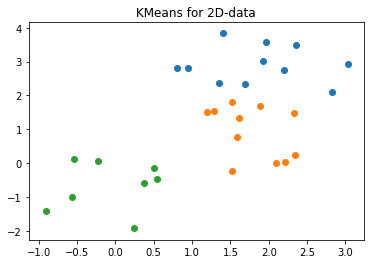

In [8]:
# plot result to 2D plane
plt.scatter(data[:, 0][label==0], data[:, 1][label==0])
plt.scatter(data[:, 0][label==1], data[:, 1][label==1])
plt.scatter(data[:, 0][label==2], data[:, 1][label==2])
plt.title("KMeans for 2D-data")
plt.savefig("2d_data_km_2d.png")
plt.show()

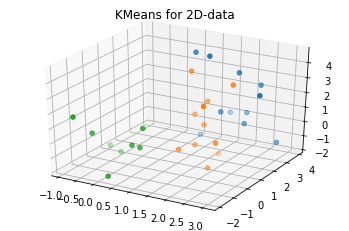

In [9]:
# plot result to 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data[:, 0][label==0], data[:, 1][label==0], data[:, 2][label==0])
ax.scatter3D(data[:, 0][label==1], data[:, 1][label==1], data[:, 2][label==1])
ax.scatter3D(data[:, 0][label==2], data[:, 1][label==2], data[:, 2][label==2])
ax.set_title("KMeans for 2D-data")
plt.savefig("2d_data_km_3d.png")
plt.show()

In [10]:
# predict cluster from 3D data
label = km.fit_predict(data)

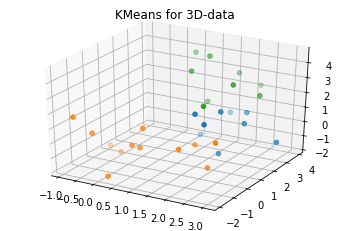

In [11]:
# plot result to 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data[:, 0][label==0], data[:, 1][label==0], data[:, 2][label==0])
ax.scatter3D(data[:, 0][label==1], data[:, 1][label==1], data[:, 2][label==1])
ax.scatter3D(data[:, 0][label==2], data[:, 1][label==2], data[:, 2][label==2])
ax.set_title("KMeans for 3D-data")
plt.savefig("3d_data_km.png")
plt.show()

In [12]:
# calculate distance between points
diff = data.reshape(30, 1, 3) - data.reshape(1, 30, 3)
dist = np.sqrt(np.sum(diff**2, axis=2))

In [13]:
from sklearn.manifold import MDS

In [14]:
# initialize MDS class
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)

In [15]:
# transform data by MDS
data_mds = mds.fit_transform(dist)

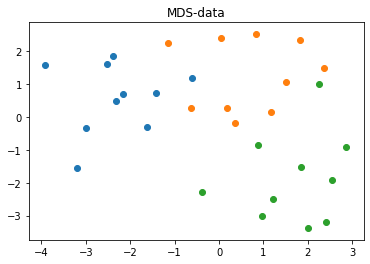

In [16]:
# plot MDS data to 2D plane
plt.scatter(data_mds[:10, 0], data_mds[:10, 1])
plt.scatter(data_mds[10:20, 0], data_mds[10:20, 1])
plt.scatter(data_mds[20:30, 0], data_mds[20:30, 1])
plt.title("MDS-data")
plt.savefig("mds_data.png")
plt.show()

In [17]:
# predict cluster from MDS data
label = km.fit_predict(data_mds)

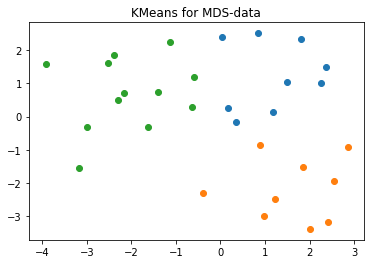

In [18]:
# plot result to 2D plane
plt.scatter(data_mds[:, 0][label==0], data_mds[:, 1][label==0])
plt.scatter(data_mds[:, 0][label==1], data_mds[:, 1][label==1])
plt.scatter(data_mds[:, 0][label==2], data_mds[:, 1][label==2])
plt.title("KMeans for MDS-data")
plt.savefig("mds_data_km_mds.png")
plt.show()

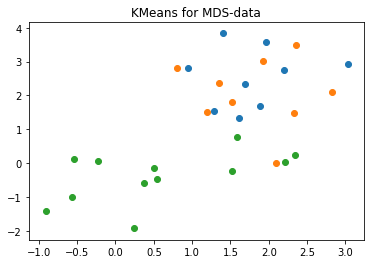

In [19]:
# plot result to 2D plane (2D data)
plt.scatter(data[:, 0][label==0], data[:, 1][label==0])
plt.scatter(data[:, 0][label==1], data[:, 1][label==1])
plt.scatter(data[:, 0][label==2], data[:, 1][label==2])
plt.title("KMeans for MDS-data")
plt.savefig("mds_data_km_2d.png")
plt.show()

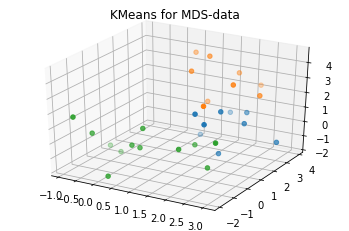

In [20]:
# plot result to 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data[:, 0][label==0], data[:, 1][label==0], data[:, 2][label==0])
ax.scatter3D(data[:, 0][label==1], data[:, 1][label==1], data[:, 2][label==1])
ax.scatter3D(data[:, 0][label==2], data[:, 1][label==2], data[:, 2][label==2])
ax.set_title("KMeans for MDS-data")
plt.savefig("mds_data_km_3d.png")
plt.show()
plt.show()